# Homework 1: Exploring Waves with Jupyter and Python

Welcome to the first homework notebook in CEE 200B.  You will work your homework here and then submit a PDF in bCourses to be graded.  That PDF is probably 1 page (maybe 2) that you can put together in word, evernote, onenote, etc.  It will have your answers to all three questions.  You can learn by working in a group, but please have your own jupyter notebook and submit your own PDF that is unique.  Make it unique by using your own words.

# HW1 Q1

Perform some useful mathematical exercises with the dispersion relation for sinusoidal waves (also called Airy or Small-amplitude waves).  

$c=\sqrt{\frac{g\lambda}{2\pi}tanh\left(\frac{2\pi h}{\lambda}\right)}$

Part A: Simplify the dispersion relation for the case in which $\lambda \lt 2h$.  Hint: 

In [1]:
import math
math.tanh(2*math.pi/2)

0.99627207622075

*Type your answer here and also submit your answer in a PDF document on bCourses for grading.*

Part B: Simplify the dispersion relation for the case in which $\lambda \gt 20h$.  Hint: the hypoerbolic tangent function obeys the same small-angle approximation that you may know from the sine function.

*Type your answer here and also submit your answer in a PDF document on bCourses for grading.*

Part C: Rewrite the Kinematic Constraint $c=\lambda/T$ using angular frequency $\omega \equiv 2\pi/T$ and $\kappa \equiv 2\pi/\lambda$

*Type your answer here and also submit your answer in a PDF document on bCourses for grading.*

Enrichment exercise: rewrite the dispersion relation using $\omega$ and $\kappa$

*Not required but you can put your answer here if you choose to do this work*

# HW1 Q2

Plot the dispersion relation for sinusoidal waves (also called Airy or Small-amplitude waves).  

$c=\sqrt{\frac{g\lambda}{2\pi}tanh\left(\frac{2\pi h}{\lambda}\right)}$

Show the effect of both water depth and wavelength.  In other words, plot $c$ as a function of $h$ and $\lambda$.  Do so either by plotting a scalar field $c=f(\lambda,h)$ or several line graphs $c=f(\lambda)$ each for a different values of $h$.  Submit your figure in a PDF document on bCourses for grading.

In [2]:
# your code here

# HW1 Q3

Consider two waves in water that is $h = 100 m$ deep.  The first wave has wavelength $\lambda_1 = 10 m$ and amplitude $\eta_{max}=0.1 m$.  The second wave has wavelength $\lambda_2 = 20 m$ and amplitude $\eta_{max}=0.12 m$. We will explore the behavior of summed waves.  I was going to assign you the following, *"plot each wave as a space-time diagram, and also plot their sum as a space-time diagram,"* but I decided to write that code for you and asking you a thinking question at the end.  Please read the code carefully and make sure you are comfortable with it, since we'll do similar work throughout the class.  If you have questions about the code, please come ask during office hours.

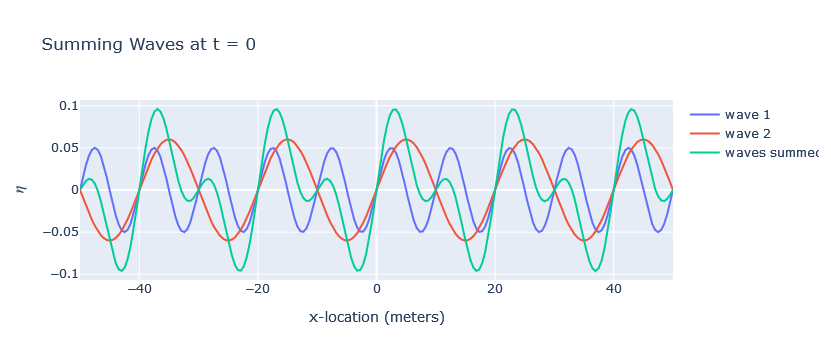

In [3]:
import math
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

#constants
g=9.81 #m/s^2
pi=math.pi

#given
h=100 #meters
lambda1 = 10 #meters
lambda2 = 20 #meters
etamax1 = 0.1 #meters
etamax2 = 0.12 #meters

#I wish we had been given wavelength and wave period.  
#Unfortunately, we have wavelength and depth.  
#So we will need to use the dispersion relation and the kinematic relation to calculate wave period.

#use the dispersion relation to calculate wave speed 
c1 = (((g*lambda1)/(2*pi))*math.tanh(2*pi*h/lambda1))**0.5 # meters per second
c2 = (((g*lambda2)/(2*pi))*math.tanh(2*pi*h/lambda2))**0.5 # meters per second

#use the wave speed and the kinematic relation to calculate wave period
T1=lambda1/c1 #wave period in seconds
T2=lambda2/c2 #wave period in seconds

#for completeness, calculate frequency and angular frequency
f1 = 1/T1 #Hertz
f2 = 1/T2 #Hertz
omega1 = 2*pi/T1 #radians per second
omega2 = 2*pi/T2 #radians per second
kappa1 = 2*pi/lambda1 #radians per meter
kappa2 = 2*pi/lambda2 #radians per meter


#before we go to a full space-time diagram, lets do a space-only plot of the waves at t=0
t=0

#let's examine a range of locations in space
x0=-50
xf=50
nx=200
x=np.linspace(x0,xf,nx)

#calculate the waves
eta1_at_t0=0.5*etamax1*np.sin((kappa1*x)-(omega1*t))
eta2_at_t0=0.5*etamax2*np.sin((kappa2*x)-(omega2*t))
summed_wave_at_t0=eta1_at_t0+eta2_at_t0


fig = go.Figure(data=go.Scatter(x=x, y=eta1_at_t0, name = 'wave 1'))
fig.add_trace(go.Scatter(x=x, y=eta2_at_t0, name = 'wave 2'))
fig.add_trace(go.Scatter(x=x, y=summed_wave_at_t0, name = 'waves summed'))
fig.update_layout(title='Summing Waves at t = 0',
                   xaxis_title='x-location (meters)',
                   yaxis_title='$\eta$ (meters)')
fig.show()

I am curious how this summed wave changes over time, so let's take a look

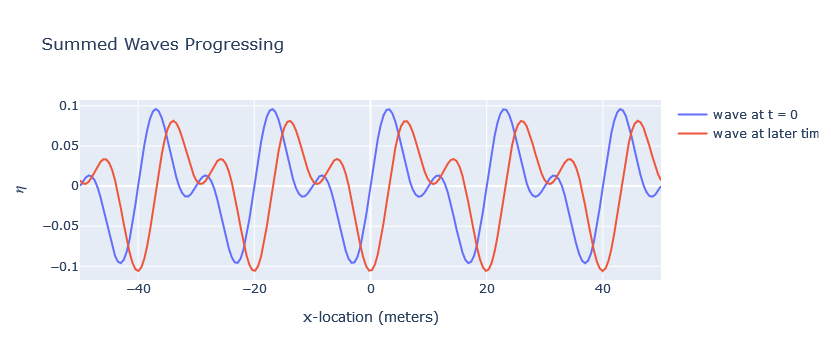

In [4]:
t = 0.7 # seconds

#calculate the waves, overwriting the previous results
eta1_at_t1=0.5*etamax1*np.sin((kappa1*x)-(omega1*t))
eta2_at_t1=0.5*etamax2*np.sin((kappa2*x)-(omega2*t))
summed_wave_at_t1=eta1_at_t1+eta2_at_t1

fig = go.Figure(data=go.Scatter(x=x, y=summed_wave_at_t0, name = 'wave at t = 0'))
fig.add_trace(go.Scatter(x=x, y=summed_wave_at_t1, name = 'wave at later time'))
fig.update_layout(title='Summed Waves Progressing',
                   xaxis_title='x-location (meters)',
                   yaxis_title='$\eta$ (meters)')
fig.show()


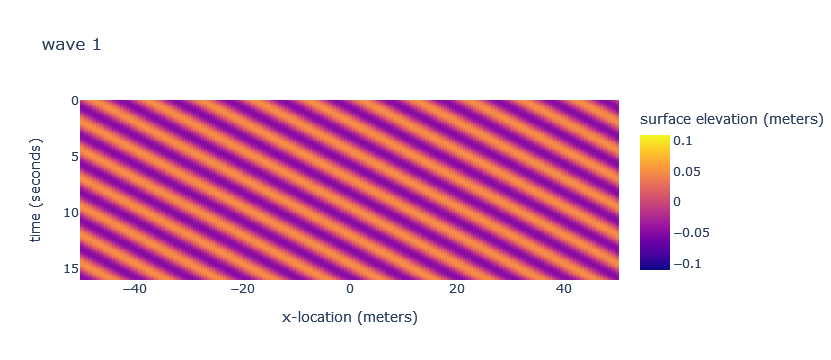

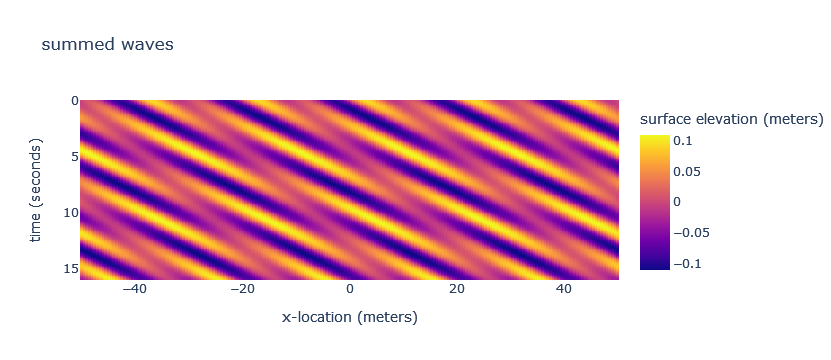

In [5]:
#now let's go to the full space-time diagram

#let's consider a range of times
t0=0
tf=16
nt=200
t=np.linspace(t0,tf,nt)

#initialize the arrays 
w1=np.ones((nt,nx))
w2=np.ones((nt,nx))
ws=np.ones((nt,nx))

#fill each array with wave state at each of the times we are considering
for i in range(nt):
    # print(ti)
    ti=t[i]
    eta1=0.5*etamax1*np.sin((kappa1*x)-(omega1*ti))
    eta2=0.5*etamax2*np.sin((kappa2*x)-(omega2*ti))
    w1[i]=eta1
    w2[i]=eta2
    ws[i]=eta1+eta2
fig1 = px.imshow(w1,x=x,y=t,zmin=-.11,zmax=.11,aspect='none',labels=dict(x="x-location (meters)", y="time (seconds)", color="surface elevation (meters)"),title='wave 1')
fig1.show()
fig3 = px.imshow(ws,x=x,y=t,zmin=-.11,zmax=.11,aspect='none',labels=dict(x="x-location (meters)", y="time (seconds)", color="surface elevation (meters)"),title='summed waves')
fig3.show()

In [6]:
print('The speed of wave 1 as calculated from the dispersion relation: ' + str(c1) + ' m/s')

The speed of wave 1 as calculated from the dispersion relation: 3.9513415338736455 m/s


A space-time diagram of a single-frequency wave allows you to read the speed from the slope of the lines.  Do this with wave 1 and fill in your answer here

In [7]:
distance = <your answer here>
time = <your answer here>
speed = distance/time
print('The speed of wave 1 as calculated from the slope read off the space-time diagram is: ' + str(speed) + ' m/s')

SyntaxError: invalid syntax (3688633481.py, line 1)

What speed or speeds do you get from the slopes you can read off the space-time diagram of two summed waves?  Think about this question, use the code above to explore (adding more code if it helps you think and explore and learn), and write a few sentences.  I will grade those sentences on the logic within them, not on whether you re-discovered all of wave science on your own.  Submit those sentences in your PDF on bCourses to be graded.  Include figures in your answer to this question if you want to, but figures are not required. 

In [ ]:
<add more cells if you need them to write code and notes about your thinking>